### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
OZ project Project<br>
-- Scratch Notebook 
</H1>

<b>This notebook is just used for testing random bits of code and experimenting</b>





---
### <b style="color:blue"> Some set up </b>

***Import Modules***

In [197]:
##
## Import some modules
##

from scipy import io
from scipy import constants as constants
import sys
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/radynpy/')
sys.path.insert(0,'/Users/gskerr1/Documents/Research/OrrallZirkerEffect/')


import radynpy
from radynpy.utils import RadynMovie as RM
import OrrallZirkerPy as OZpy
from OrrallZirkerPy.Atmos import AmbientPops, SuprathermalParticles 
from OrrallZirkerPy.AtomData import CSec_H3lev as H3lev
from OrrallZirkerPy.AtomData import CSec_H2lev as H2lev
from OrrallZirkerPy.AtomData import CSecActive, EinsteinA, Transitions
from OrrallZirkerPy.SuprathermalPops import CalcPops
from OrrallZirkerPy.CrossSections import chebyshev_fn as Cheb
from OrrallZirkerPy.CrossSections import CrossSec
from OrrallZirkerPy.EnergyToVel import energy2vel 
from OrrallZirkerPy.OZeffect import OZ
from OrrallZirkerPy.Emission import CalcEmissiv
from numpy.polynomial.polynomial import Polynomial as Poly


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import LogLocator
from matplotlib import ticker
import matplotlib.colorbar as cb
import pandas as pd

import cmocean
import colorcet as ccet
import palettable as pal 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [198]:
import importlib
importlib.reload(OZpy.CrossSections)
importlib.reload(OZpy.AtomData)
importlib.reload(OZpy.Atmos)
importlib.reload(OZpy.EnergyToVel)
importlib.reload(OZpy.SuprathermalPops)
importlib.reload(OZpy.OZeffect)
importlib.reload(OZpy.Emission)


<module 'OrrallZirkerPy.Emission' from '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/OrrallZirkerPy/Emission.py'>

In [161]:
##
## Plot properties (these are just personal preference)
##

#Avenir LT Std
font = {'family': 'Avenir LT Std',
        'color':  'black',
        'weight': 'medium',
        'size': 22,
        }
plot_params = {'ytick.direction': 'in', 
               'xtick.direction': 'in', 
               'xtick.minor.visible': True,
               'ytick.minor.visible': True,
               'xtick.major.size': 10, 'xtick.minor.size': 5,
               'ytick.major.size': 10, 'ytick.minor.size': 5,
               'ytick.right': False,
               'xtick.top': False,
               'ytick.major.width': 1.5,
               'xtick.major.width': 1.5,
               'ytick.minor.width': 1.5,
               'xtick.minor.width': 1.5,
               'axes.linewidth': 1.5,
               'axes.spines.top': False,
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': False,
               'axes.titlepad' : 18 }

plot_lg_params = {'legend.frameon': False}
#plt.rcParams.update({'font.size': font['size'], 'font.family':font['family'], 'font.weight':font['weight'], 'font.color':font['color']})

plt.rcParams.update({'font.size':font['size'], 'font.family':font['family'], 'font.weight':font['weight']})
plt.rcParams.update({'ytick.direction': plot_params['ytick.direction'],
                     'xtick.direction': plot_params['xtick.direction'],
                     'xtick.minor.visible': plot_params['xtick.minor.visible'],
                     'ytick.minor.visible': plot_params['ytick.minor.visible'],
                     'ytick.major.size':  plot_params['ytick.major.size'], 
                     'ytick.minor.size':  plot_params['ytick.minor.size'],
                     'xtick.major.size':  plot_params['xtick.major.size'],                                
                     'xtick.minor.size':  plot_params['xtick.minor.size'],
                     'ytick.right': plot_params['ytick.right'],
                     'xtick.top': plot_params['xtick.top'],
                     'ytick.major.width': plot_params['ytick.major.width'],
                     'xtick.major.width': plot_params['xtick.major.width'],
                     'ytick.minor.width': plot_params['ytick.minor.width'],
                     'xtick.minor.width': plot_params['xtick.minor.width'],                    
                     'axes.linewidth': plot_params['axes.linewidth'],
                     'axes.spines.top' : plot_params['axes.spines.top'],
                     'axes.spines.bottom' : plot_params['axes.spines.bottom'],
                     'axes.spines.left' : plot_params['axes.spines.left'],
                     'axes.spines.right' : plot_params['axes.spines.right'],
                     'axes.titlepad' : plot_params['axes.titlepad'],
                    })

plt.rcParams.update({'legend.frameon': plot_lg_params['legend.frameon']})

mpl.mathtext.SHRINK_FACTOR = 0.6
mpl.mathtext.GROW_FACTOR = 1 / 0.6





template = dict(
        layout = go.Layout(font = dict(family = "Rockwell", size = 18),
                           title_font = dict(family = "Rockwell", size = 22), 
                           plot_bgcolor = 'white',
                           paper_bgcolor = 'white',
                           xaxis = dict(
                                showexponent = 'all',
                                exponentformat = 'e',
                                tickangle = 0,
                                linewidth = 4,
                                showgrid = True,
                            ),
                            yaxis = dict(
                          showexponent = 'all',
                          exponentformat = 'e',
                                linewidth = 4,
                                showgrid = True,
                                anchor = 'free',
                                position = 0,
                                domain = [0.0,1]
                            ),
                            coloraxis_colorbar = dict(
                                thickness = 15,
                                tickformat = '0.2f',
                                ticks = 'outside',
                                titleside = 'right'
                            )
                            ))

---
---
### <b style="color:blue"> Setting the 'active' cross sections </b>

<b>CrossSecActive.py should be modified if you want to select different cross sections. It extracts them from CrossSections.py, so they have to be located there first.</b>
> - Set up an energy range. 
> - Create the csec object to extract *all* cross sections. From this, you can create objects holding cross sections from the various sources.<br>
> - Create the active set object from the set list (either H3lev, or H2lev)... this ***does not*** require the OZpy.CrossSections.CrossSec object. <b style="color:red"> Is this confusing, should I rename some things?</b>

In [ ]:
energy = np.arange(1,8001,1)
csec = OZpy.CrossSections.CrossSec(energy)
kerr = csec.cs_kerr_poly()
csactive_3lev = H3lev(energy)
csactive_2lev = H2lev(energy)



---
---
### <b style="color:blue"> Read in a RADYN atmosphere and create the atmos object </b>
> - Does not need to be a RADYN atmosphere, can be anything that gives you hydrogen, electron, and proton number densities.<br>


In [4]:
###
### Read the RADYN atmosphere
###
dir1 = '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/protonbeam_simulations/F11/'
# cdf1 = radynpy.cdf.LazyRadynData(dir1+'QSHTSL_0.75F10_d7_ec20_t30s_oneD_ne200_ext.cdf')
file1 = 'radyn_out.100keV.5.F11.sav'

RADYN = io.readsav(dir1+file1, python_dict=True)
# RADYN = RADYN['radyn_struct']


In [5]:
nElec = RADYN['ne1t']
nHyd = np.sum(RADYN['n1t'][:,0,0:4,:],axis=1)
nProt = RADYN['n1t'][:,0,5,:]
height = RADYN['z1t']
times = RADYN['timet']


In [6]:
en = RADYN['fp_e']

nthmp_e =  0.5*(en[0:len(en)-1]+en[1:len(en)])
nthmp_mu = RADYN['fp_mu']
nthmp_f = RADYN['fp_ft']

dimsEn = nthmp_e.shape
dimsMu = nthmp_mu.shape
dimsF = nthmp_f.shape



In [41]:
dzt = np.roll(height[:,:],1) - height[:,:] 
dzt[:,0]= 0

In [52]:
ind = np.where(height[0,:] == np.max(height[0,:]))[0][0]
ind

0

90


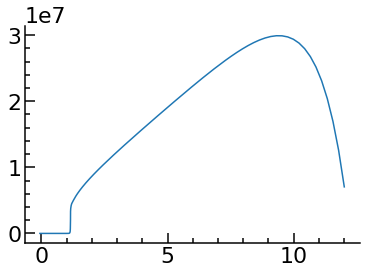

In [87]:
eind = np.abs(nthmp_e - 100).argmin()
print(eind)
plt.plot(RADYN['z1t'][0,:]/1e8,RADYN['fp_ft'][0,:,eind]*4*constants.pi)
# plt.xlim(0,1.5)
# plt.yscale('log')
# plt.ylim([,1000])


---
---
### <b style="color:blue"> Test the OZ Code </b>



In [199]:
Emiss, SupraThmPops, atmos  = OZ(nLev=3, nHyd=nHyd[:,:], nElec=nElec[:,:], nProt=nProt[:,:], 
               height=height[:,:], times=times[:], 
               nthmp_e=nthmp_e, nthmp_mu=nthmp_mu, nthmp_f=nthmp_f[:,:,:], ionfrac=1.0, isum = -1)

allout  = OZ(nLev=3, nHyd=nHyd[:,:], nElec=nElec[:,:], nProt=nProt[:,:], 
               height=height[:,:], times=times[:], 
               nthmp_e=nthmp_e, nthmp_mu=nthmp_mu, nthmp_f=nthmp_f[:,:,:], ionfrac=1.0, isum = -1)



In [200]:
allout  = OZ(nLev=3, nHyd=nHyd[:,:], nElec=nElec[:,:], nProt=nProt[:,:], 
               height=height[:,:], times=times[:], 
               nthmp_e=nthmp_e, nthmp_mu=nthmp_mu, nthmp_f=nthmp_f[:,:,:], ionfrac=1.0, isum = -1)




In [205]:
allout[0].energy

array([5.08390639e+00, 5.25453528e+00, 5.43089090e+00, 5.61316547e+00,
       5.80155768e+00, 5.99627275e+00, 6.19752296e+00, 6.40552769e+00,
       6.62051354e+00, 6.84271493e+00, 7.07237389e+00, 7.30974073e+00,
       7.55507434e+00, 7.80864198e+00, 8.07071999e+00, 8.34159402e+00,
       8.62155927e+00, 8.91092070e+00, 9.20999385e+00, 9.51910500e+00,
       9.83859053e+00, 1.01687984e+01, 1.05100894e+01, 1.08628349e+01,
       1.12274194e+01, 1.16042403e+01, 1.19937084e+01, 1.23962479e+01,
       1.28122973e+01, 1.32423108e+01, 1.36867566e+01, 1.41461192e+01,
       1.46208992e+01, 1.51116140e+01, 1.56187984e+01, 1.61430047e+01,
       1.66848053e+01, 1.72447900e+01, 1.78235687e+01, 1.84217740e+01,
       1.90400566e+01, 1.96790889e+01, 2.03395687e+01, 2.10222159e+01,
       2.17277762e+01, 2.24570168e+01, 2.32107309e+01, 2.39897415e+01,
       2.47948978e+01, 2.56270790e+01, 2.64871903e+01, 2.73761672e+01,
       2.82949804e+01, 2.92446335e+01, 3.02261594e+01, 3.12406255e+01,
      

In [288]:
eind = np.abs(SupraThmPops.energy - 500).argmin()

In [289]:
SupraThmPops.energy[eind]

500.0438898455559

In [290]:
SupraThmPops.NPops.shape

(256, 191, 4, 300)

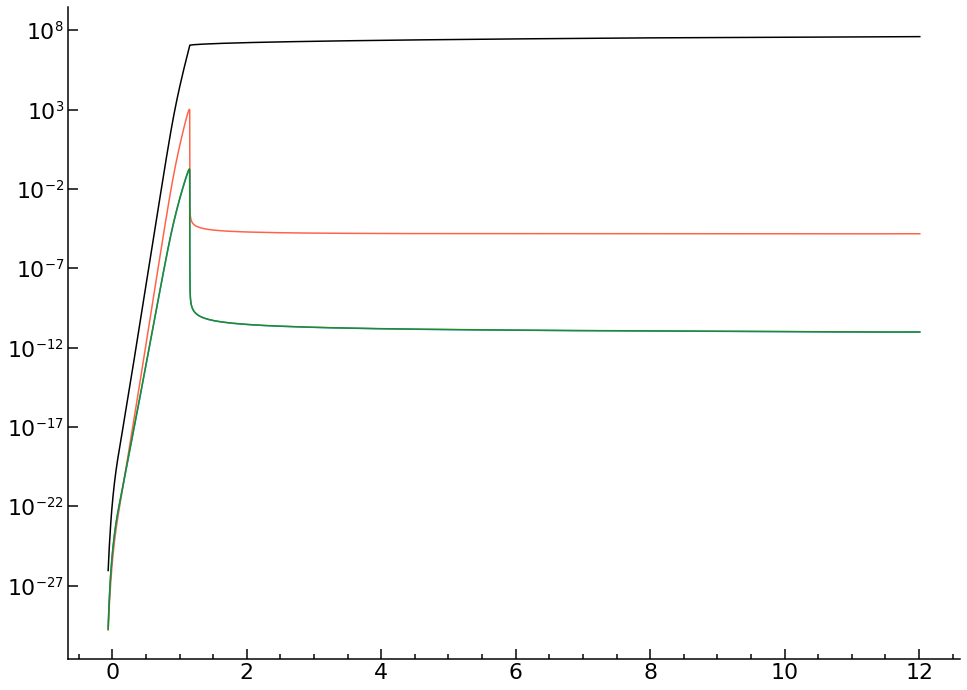

In [291]:
plt.figure(figsize=(16,12))
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,3,eind]*RADYN['fp_ft'][0,:,eind]*4*constants.pi, color = 'black')
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,0,eind]*RADYN['fp_ft'][0,:,eind]*4*constants.pi, color = 'tomato')
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,1,eind]*RADYN['fp_ft'][0,:,eind]*4*constants.pi, color = 'dodgerblue')
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,2,eind]*RADYN['fp_ft'][0,:,eind]*4*constants.pi, color = 'forestgreen')




plt.yscale('log')
plt.show()

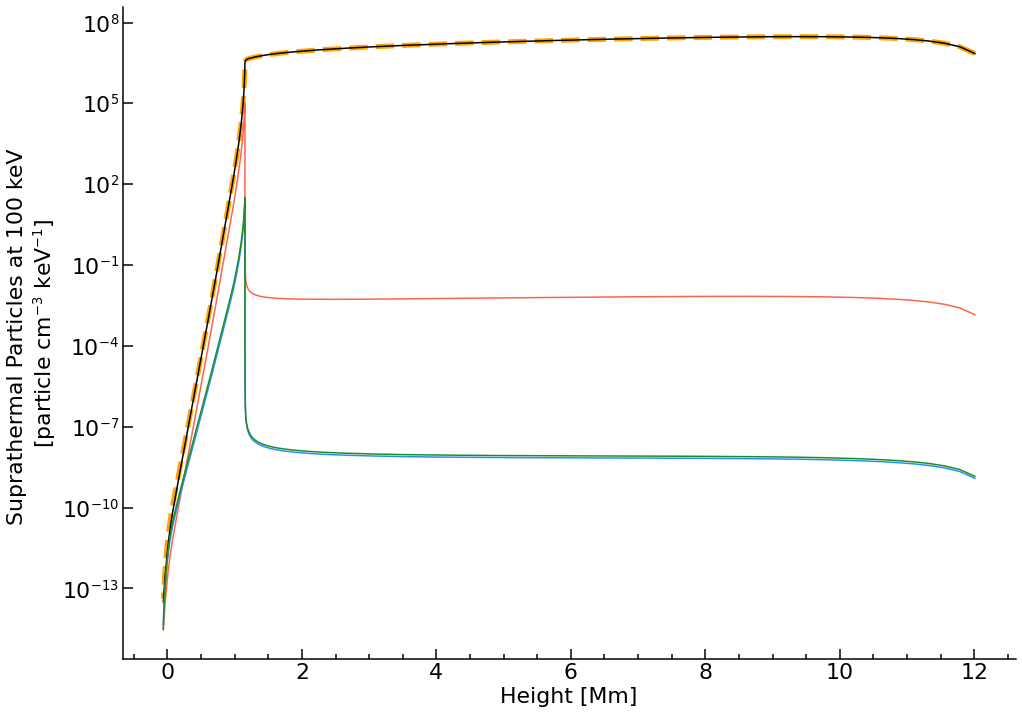

In [137]:
plt.figure(figsize=(16,12))
plt.plot(atmos.height[0,:]/1e8,RADYN['fp_ft'][0,:,eind]*4*constants.pi, color = 'orange', linewidth = 5, linestyle = '--')
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,3,eind], color = 'black')
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,0,eind], color = 'tomato')
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,1,eind], color = 'dodgerblue')
plt.plot(atmos.height[0,:]/1e8,SupraThmPops.NPops[0,:,2,eind], color = 'forestgreen')

plt.ylabel('Suprathermal Particles at 100 keV \n[particle cm$^{-3}$ keV$^{-1}$]')
plt.xlabel('Height [Mm]')
plt.yscale('log')
plt.show()

In [240]:
intensity = Emiss.emiss2int_total(height)
intensity_z = Emiss.emiss2int_z(height)
Emiss.dLambda.shape

(300, 3)

In [280]:
Emiss.emiss.shape
xEdges = 0.5 * (Emiss.dLambda[:-1,0] + Emiss.dLambda[1:,0])
xEdges = np.insert(xEdges, 0, Emiss.dLambda[0,0]) 
xEdges = np.insert(xEdges, -1, Emiss.dLambda[-1,0])

xEdges = 0.5 * (Emiss.energy[:-1] + Emiss.energy[1:])
xEdges = np.insert(xEdges, 0, Emiss.energy[0]) 
xEdges = np.insert(xEdges, -1, Emiss.energy[-1])


yEdges = 0.5 * (atmos.height[0,:-1] + atmos.height[0,1:])
yEdges = np.insert(yEdges, 0, atmos.height[0,0])
yEdges = np.insert(yEdges, -1, atmos.height[0,-1])

# im = ax1.pcolormesh(xEdges-prof['rest_wave'], 
#                     yEdges,
#                     np.transpose(prof['line_int'][muind,:,:])/1e6, 
#                     cmap = cmapexp,
#                     rasterized = True, shading = 'goaround',
#                     snap = True,
#                     norm=norm
#                     vmin = yrange_int_exp[0],
#                     vmax = yrange_int_exp[1]
#                    )

yEdges.shape

(192,)

In [273]:
inds = np.where(intensity_z[:,:,:,:] == 0.0)
intensity_z[inds] = np.nan

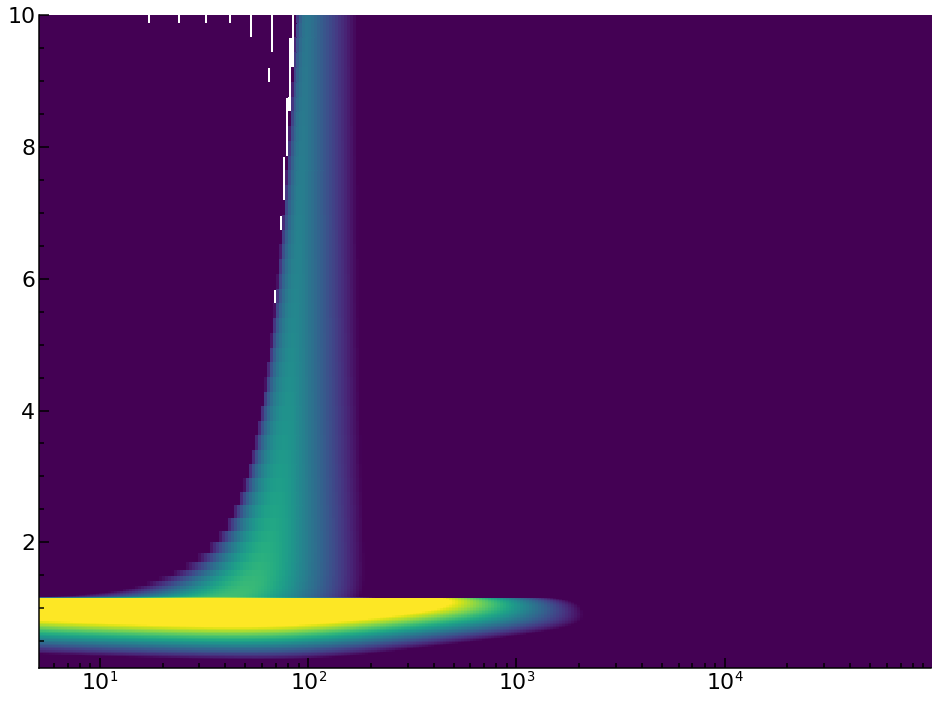

In [284]:
plt.figure(figsize=(16,12))
# plt.imshow(intensity_z[0,:,:,0], 
#            extent = [Emiss.dLambda[0,0],Emiss.dLambda[-1,0],atmos.height[0,-1]/1e8,atmos.height[0,0]/1e8,],
#           origin = 'lower', aspect = 'auto')
# plt.plot(Emiss.dLambda[:,1],intensity[0,:,1], color = 'tomato', linewidth = 3)
# plt.plot(Emiss.dLambda[:,2],intensity[0,:,2], color = 'dodgerblue', linewidth = 3)
# plt.text(100, 1e6, r'Ly$\alpha$')
# plt.text(100, 3e5, r'Ly$\beta$', color = 'tomato')
# plt.text(100, 1e5, r'H$\alpha$', color = 'dodgerblue')

plt.pcolormesh(xEdges, yEdges/1e8, np.log10(intensity_z[0,:,:,0]),
               rasterized = True, shading = 'goaround', 
               snap = True, vmax = 0, vmin = -5)


# plt.ylabel('Intensity\n[erg cm$^{-2}$ s$^{-1}$ sr$^{-1}$ $\mathrm{\AA}^{-1}$]')
# plt.xlabel('$\Delta \lambda [\mathrm{\AA}]$')
plt.xscale('log')
# plt.yscale('log')
# plt.ylim([1e0, 1e7])
plt.ylim([0.1, 10])
plt.show()

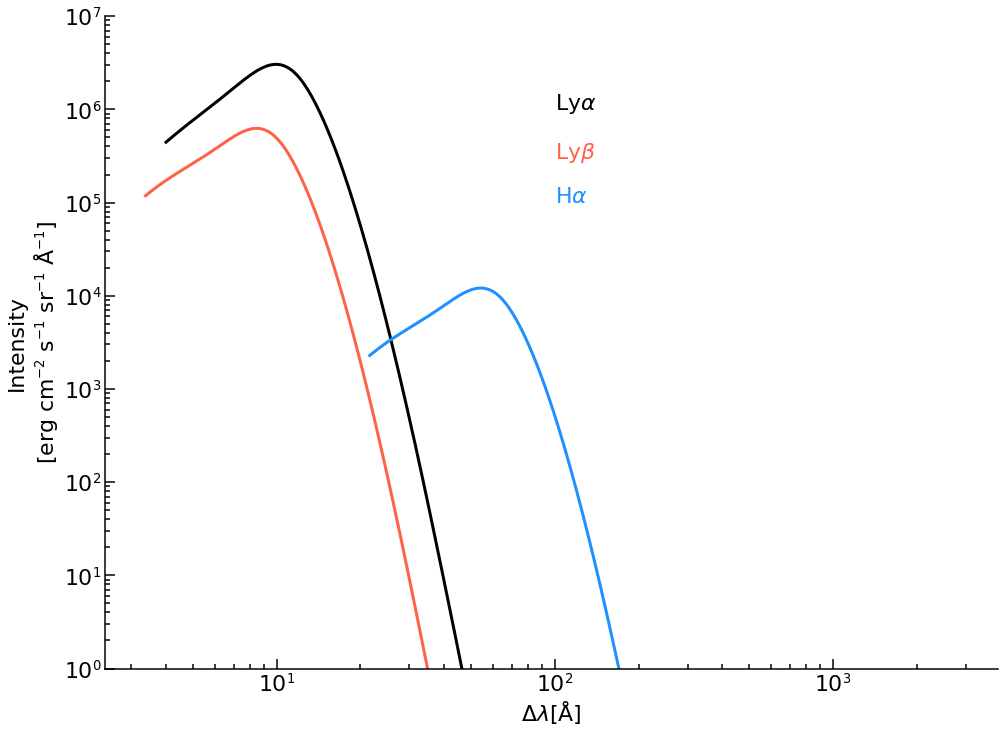

In [206]:
plt.figure(figsize=(16,12))
plt.plot(Emiss.dLambda[:,0],intensity[0,:,0], color = 'black', linewidth = 3)
plt.plot(Emiss.dLambda[:,1],intensity[0,:,1], color = 'tomato', linewidth = 3)
plt.plot(Emiss.dLambda[:,2],intensity[0,:,2], color = 'dodgerblue', linewidth = 3)
plt.text(100, 1e6, r'Ly$\alpha$')
plt.text(100, 3e5, r'Ly$\beta$', color = 'tomato')
plt.text(100, 1e5, r'H$\alpha$', color = 'dodgerblue')




plt.ylabel('Intensity\n[erg cm$^{-2}$ s$^{-1}$ sr$^{-1}$ $\mathrm{\AA}^{-1}$]')
plt.xlabel('$\Delta \lambda [\mathrm{\AA}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e0, 1e7])
plt.show()

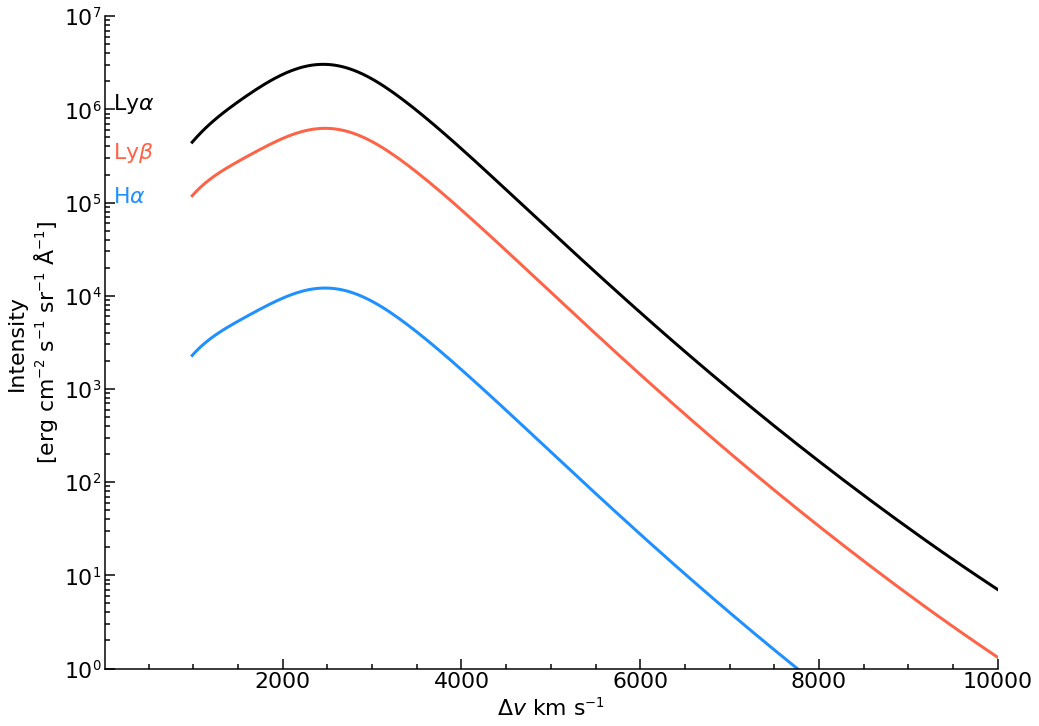

In [193]:
plt.figure(figsize=(16,12))
plt.plot(Emiss.dVel,intensity[0,:,0], color = 'black', linewidth = 3)
plt.plot(Emiss.dVel,intensity[0,:,1], color = 'tomato', linewidth = 3)
plt.plot(Emiss.dVel,intensity[0,:,2], color = 'dodgerblue', linewidth = 3)
plt.text(100, 1e6, r'Ly$\alpha$')
plt.text(100, 3e5, r'Ly$\beta$', color = 'tomato')
plt.text(100, 1e5, r'H$\alpha$', color = 'dodgerblue')




plt.ylabel('Intensity\n[erg cm$^{-2}$ s$^{-1}$ sr$^{-1}$ $\mathrm{\AA}^{-1}$]')
plt.xlabel('$\Delta v$ km s$^{-1}$')
# plt.xscale('log')
plt.yscale('log')
plt.ylim([1e0, 1e7])
plt.xlim([10, 10000])
plt.show()